In [1]:
import numpy as np
#%matplotlib inline
import matplotlib.pyplot as plt
plt.ion()

import Corrfunc

from Corrfunc.mocks.DDsmu_mocks import DDsmu_mocks
from Corrfunc.utils import compute_amps
from Corrfunc.utils import evaluate_xi

# Tophat on mock data

### Set up parameters

Here we use a low-density lognormal simulation box.

In [2]:
boxsize = 750
nbar_str = '1e-5'
proj_type = 'tophat'

rmin = 40
rmax = 150
nbins = 11

mumax = 1.0
seed = 0
#weight_type='pair_product'
weight_type=None

In [3]:
rbins = np.linspace(rmin, rmax, nbins+1)
rcont = np.linspace(rmin, rmax, 1000)

cat_tag = '_L{}_nbar{}'.format(boxsize, nbar_str)
cat_dir = '../byebyebias/catalogs/cats_lognormal{}'.format(cat_tag)

cosmo = 1 #doesn't matter bc passing cz, but required
nthreads = 24
nmubins = 1
verbose = True

### Load in data and randoms

In [4]:
# data
datasky_fn = '{}/catsky_lognormal{}_seed{}.dat'.format(cat_dir, cat_tag, seed)
datasky = np.loadtxt(datasky_fn)
ra, dec, z = datasky.T
nd = datasky.shape[0]
#weights = np.full(nd, 0.5)
weights = None

In [5]:
# randoms
randsky_fn = '{}/randsky{}_10x.dat'.format(cat_dir, cat_tag)
randomsky = np.loadtxt(randsky_fn)
ra_rand, dec_rand, z_rand = randomsky.T
nr = randomsky.shape[0]
#weights_rand = np.full(nr, 0.5)
weights_rand = None

### Perform xi(s, mu) continous estimation

In [6]:
# projection
dd_res_corrfunc, dd_proj, _ = DDsmu_mocks(1, cosmo, nthreads, mumax, nmubins, rbins, ra, dec, z,
                is_comoving_dist=True, proj_type=proj_type, nprojbins=nbins, verbose=verbose, 
                weights1=weights, weight_type=weight_type)

dr_res_corrfunc, dr_proj, _ = DDsmu_mocks(0, cosmo, nthreads, mumax, nmubins, rbins, 
                ra, dec, z, RA2=ra_rand, DEC2=dec_rand, CZ2=z_rand, 
                is_comoving_dist=True, proj_type=proj_type, nprojbins=nbins, verbose=verbose,
                weights1=weights, weights2=weights_rand, weight_type=weight_type)

rr_res_corrfunc, rr_proj, qq_proj = DDsmu_mocks(1, cosmo, nthreads, mumax, nmubins, rbins, ra_rand, dec_rand, z_rand,
                is_comoving_dist=True, proj_type=proj_type, nprojbins=nbins, verbose=verbose,
                weights1=weights_rand, weight_type=weight_type)

In [7]:
amps = compute_amps(nbins, nd, nd, nr, nr, dd_proj, dr_proj, dr_proj, rr_proj, qq_proj)
xi_proj = evaluate_xi(nbins, amps, len(rcont), rcont, len(rbins)-1, rbins, proj_type)

Computing amplitudes (Corrfunc/utils)
[0.03397434659150982, 0.02937162643177822, -0.0006946117597155749, -0.005558705819002792, -0.002525596466932429, -0.006964443658262263, -0.005074186154115213, -0.003394010407329386, 0.005753917119789998, 0.009915749079357892, 0.002793795928266518]
Evaluating xi (Corrfunc/utils)


### Perform xi(s, mu) standard estimation

In [8]:
def extract_counts(res, weight_type=None):
    counts = np.array([x[4] for x in res], dtype=float)
    print(counts)
    if weight_type:
        weights = np.array([x[5] for x in res], dtype=float)
        print(weights)
        counts *= weights
    return counts

In [9]:
# standard
proj_type = None
dd_res_corrfunc, _, _ = DDsmu_mocks(1, cosmo, nthreads, mumax, nmubins, rbins, ra, dec, z,
                is_comoving_dist=True, proj_type=proj_type, nprojbins=nbins, verbose=verbose,
                weights1=weights, weight_type=weight_type)
dd = extract_counts(dd_res_corrfunc, weight_type)

dr_res_corrfunc, _, _ = DDsmu_mocks(0, cosmo, nthreads, mumax, nmubins, rbins, 
                ra, dec, z, RA2=ra_rand, DEC2=dec_rand, CZ2=z_rand, 
                is_comoving_dist=True, proj_type=proj_type, nprojbins=nbins, verbose=verbose,
                weights1=weights, weights2=weights_rand, weight_type=weight_type)
dr = extract_counts(dr_res_corrfunc, weight_type)

rr_res_corrfunc, _, _ = DDsmu_mocks(1, cosmo, nthreads, mumax, nmubins, rbins, ra_rand, dec_rand, z_rand,
                is_comoving_dist=True, proj_type=proj_type, nprojbins=nbins, verbose=verbose,
                weights1=weights_rand, weight_type=weight_type)
rr = extract_counts(rr_res_corrfunc, weight_type)

[10162. 14922. 19532. 25656. 32156. 39122. 46610. 55134. 64304. 73656.
 82538.]
[ 97714. 143358. 194541. 255298. 319875. 391258. 466232. 548865. 634135.
 722979. 815556.]
[ 971480. 1417178. 1936302. 2526378. 3173972. 3885778. 4639944. 5445524.
 6289266. 7166298. 8080720.]


In [10]:
fN = float(nr)/float(nd)
xi_ls = (dd * fN**2 - 2*dr * fN + rr)/rr
print("Standard L-S:")
print(xi_ls)

Standard L-S:
[ 0.03397435  0.02937163 -0.00069461 -0.00555871 -0.0025256  -0.00696444
 -0.00507419 -0.00339401  0.00575392  0.00991575  0.0027938 ]


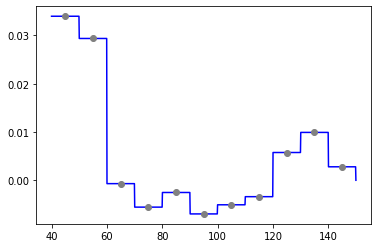

In [11]:
rbins_avg = 0.5*(rbins[1:]+rbins[:-1])
plt.plot(rcont, xi_proj, color='blue')
plt.plot(rbins_avg, xi_ls, marker='o', color='grey', ls='None')

In [12]:
#!jupyter nbconvert --to script example.ipynb

NameError: name 'np' is not defined